In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def movimiento(X, t, m, k, gamma, f_0, omega_f):
    x, v = X
    dXdt = [v, -(k/m)*x - gamma*v + (f_0/m) * np.cos(omega_f * t)]
    return dXdt

In [3]:
n_points = 50000
X0 = [1.0, 0.0]
t = np.linspace(0,150, n_points)
m = 1.0
k = 1.0
gamma = 0.0
f_0 = 0.0
omega_f = 1.0
sol = odeint(movimiento, X0, t, args=(m, k, gamma, f_0, omega_f))
x_libre = sol[:,0]
v_libre = sol[:,1]

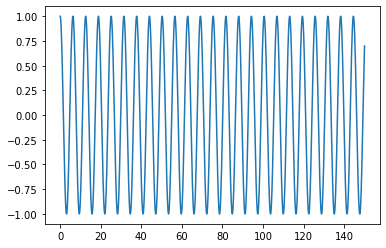

In [4]:
plt.plot(t, x_libre)

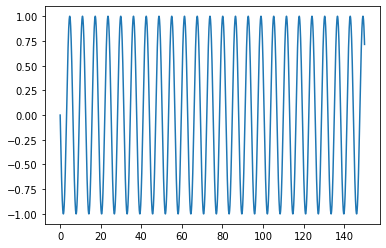

In [5]:
plt.plot(t, v_libre)

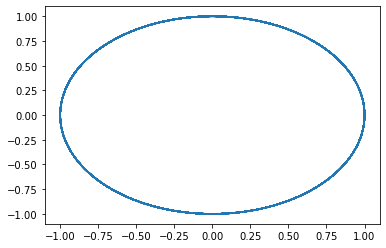

In [6]:
plt.plot(x_libre, v_libre)

In [7]:
gamma = 0.10
sol = odeint(movimiento, X0, t, args=(m, k, gamma, f_0, omega_f))
x_fricc = sol[:,0]
v_fricc = sol[:,1]

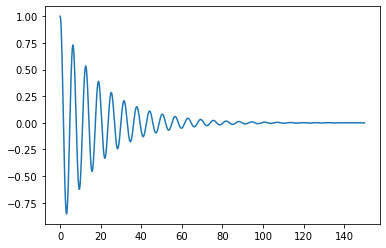

In [8]:
plt.plot(t, x_fricc)

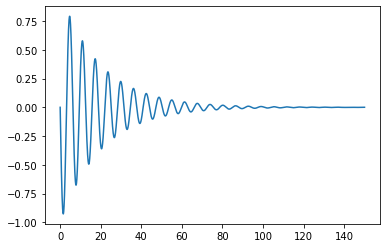

In [9]:
plt.plot(t, v_fricc)

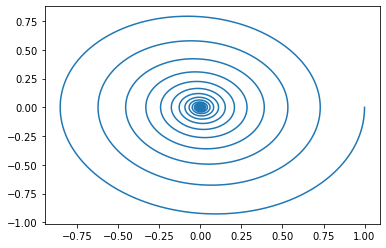

In [10]:
plt.plot(x_fricc, v_fricc)

In [11]:
gamma = 0.05
f_0 = 1.0
omega_f = 0.25
sol = odeint(movimiento, X0, t, args=(m, k, gamma, f_0, omega_f))
x_A = sol[:,0]
v_A = sol[:,1]

In [19]:
gamma = 0.05
f_0 = 1.0
omega_f = 2.0
sol = odeint(movimiento, X0, t, args=(m, k, gamma, f_0, omega_f))
x_B = sol[:,0]
v_B = sol[:,1]

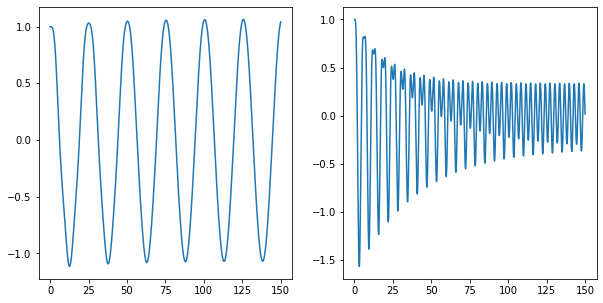

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(t, x_A)

plt.subplot(1,2,2)
plt.plot(t, x_B)

(140.0, 150.0)

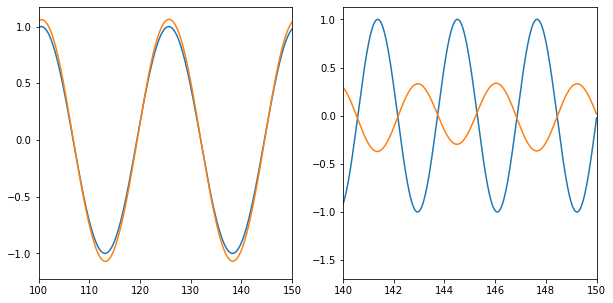

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(t, np.cos(0.25 * t))
plt.plot(t, x_A)
plt.xlim(100, 150)

plt.subplot(1,2,2)
plt.plot(t, np.cos(2.0 * t))
plt.plot(t, x_B)
plt.xlim(140, 150.0)

In [22]:
n_omega = 200
omega_f_values = np.linspace(0.5, 1.5, n_omega)
amplitud_A = np.ones(n_omega)
for i in range(n_omega):
    gamma = 0.05
    f_0 = 0.5
    omega_f = omega_f_values[i]
    sol = odeint(movimiento, X0, t, args=(m, k, gamma, f_0, omega_f))
    x = sol[:,0]
    v = sol[:,1]
    amplitud_A[i] = np.max(x[-n_points//5:]) - np.min(x[-n_points//5:])

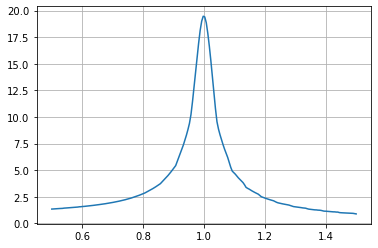

In [23]:
plt.plot(omega_f_values, amplitud_A)
plt.grid()

In [24]:
n_omega = 200
omega_f_values = np.linspace(0.5, 1.5, n_omega)
amplitud_B = np.ones(n_omega)
for i in range(n_omega):
    gamma = 0.2
    f_0 = 0.5
    omega_f = omega_f_values[i]
    sol = odeint(movimiento, X0, t, args=(m, k, gamma, f_0, omega_f))
    x = sol[:,0]
    v = sol[:,1]
    amplitud_B[i] = np.max(x[-n_points//5:]) - np.min(x[-n_points//5:])

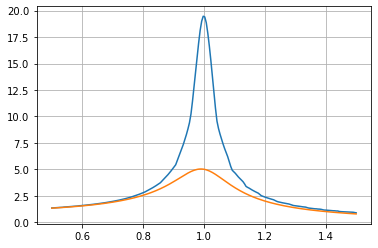

In [25]:
plt.plot(omega_f_values, amplitud_A)
plt.plot(omega_f_values, amplitud_B)
plt.grid()